In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [38]:
df= pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.shape

(4269, 13)

In [4]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [39]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
df['income_annum'].value_counts()

income_annum
7000000    62
4100000    59
7600000    57
4700000    56
5300000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64

In [8]:
df.groupby('loan_status')['cibil_score'].mean()

loan_status
Approved    703.461973
Rejected    429.468072
Name: cibil_score, dtype: float64

In [9]:
df.groupby('loan_status')['income_annum'].mean()

loan_status
Approved    5.025904e+06
Rejected    5.113825e+06
Name: income_annum, dtype: float64

In [40]:
asset_col = [
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]
df.groupby('loan_status')[asset_col].mean()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_status,,,,
Approved,7.399812e+06,5.001355e+06,1.501660e+07,4.959526e+06
Rejected,7.592498e+06,4.926720e+06,1.530694e+07,5.004960e+06


<Axes: xlabel='loan_status', ylabel='count'>

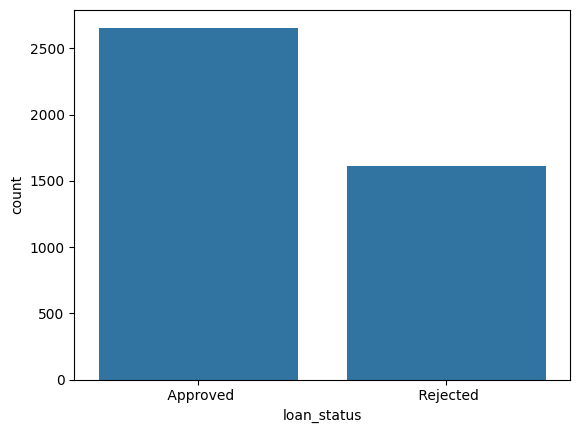

In [11]:
sb.countplot(data=df,x='loan_status')

<Axes: xlabel='loan_status', ylabel='cibil_score'>

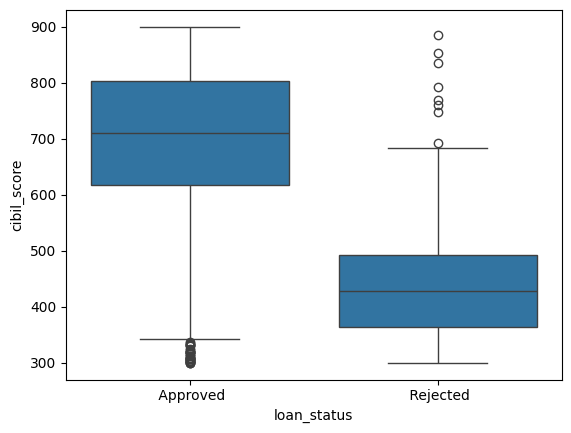

In [12]:
sb.boxplot(data=df,x='loan_status',y='cibil_score')

<Axes: xlabel='loan_status', ylabel='income_annum'>

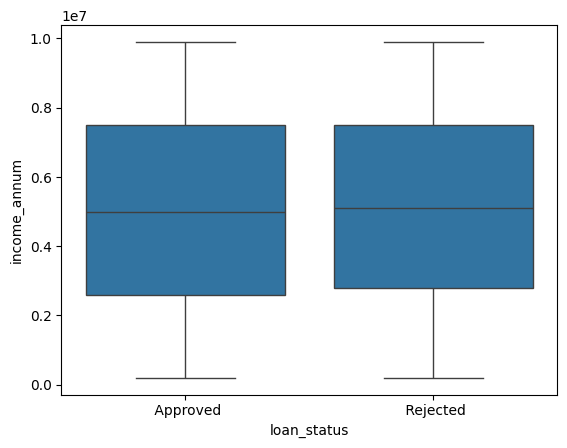

In [13]:
sb.boxplot(data=df,x='loan_status',y='income_annum')

<Axes: xlabel='income_annum', ylabel='loan_amount'>

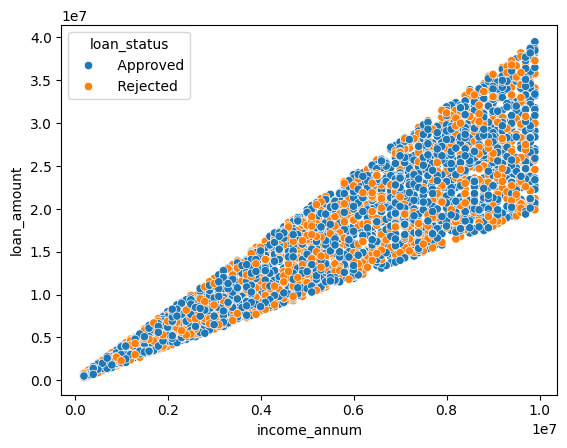

In [15]:
sb.scatterplot(data=df , x='income_annum',y='loan_amount',hue='loan_status')

<Axes: xlabel='education', ylabel='count'>

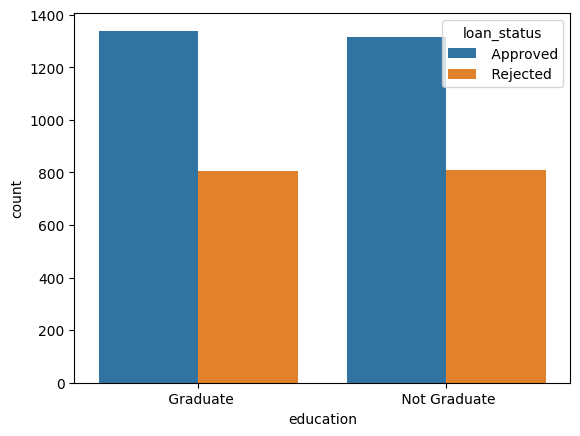

In [16]:
sb.countplot(data=df,x='education',hue='loan_status')

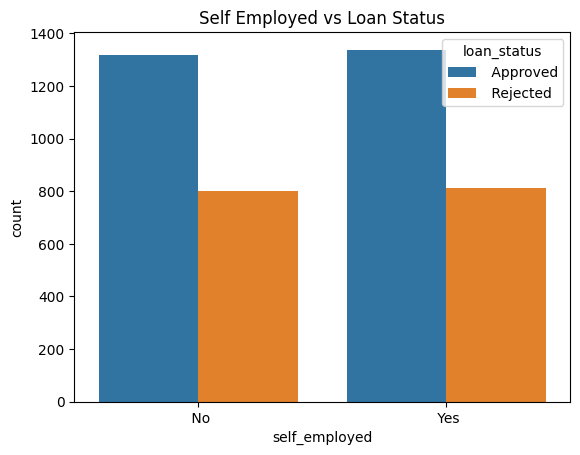

In [17]:
sb.countplot(data=df, x='self_employed', hue='loan_status')
plt.title('Self Employed vs Loan Status')
plt.show()


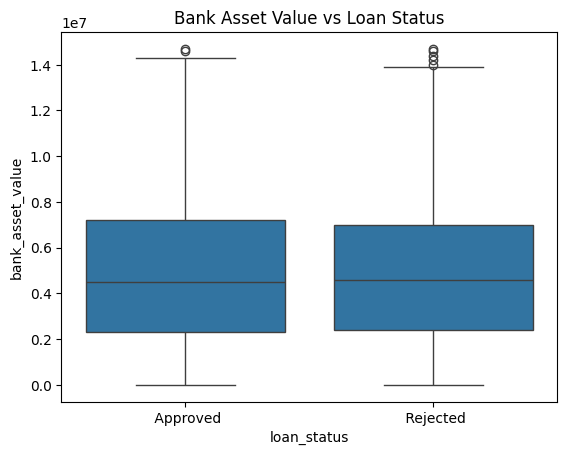

In [18]:
sb.boxplot(data=df, x='loan_status', y='bank_asset_value')
plt.title('Bank Asset Value vs Loan Status')
plt.show()


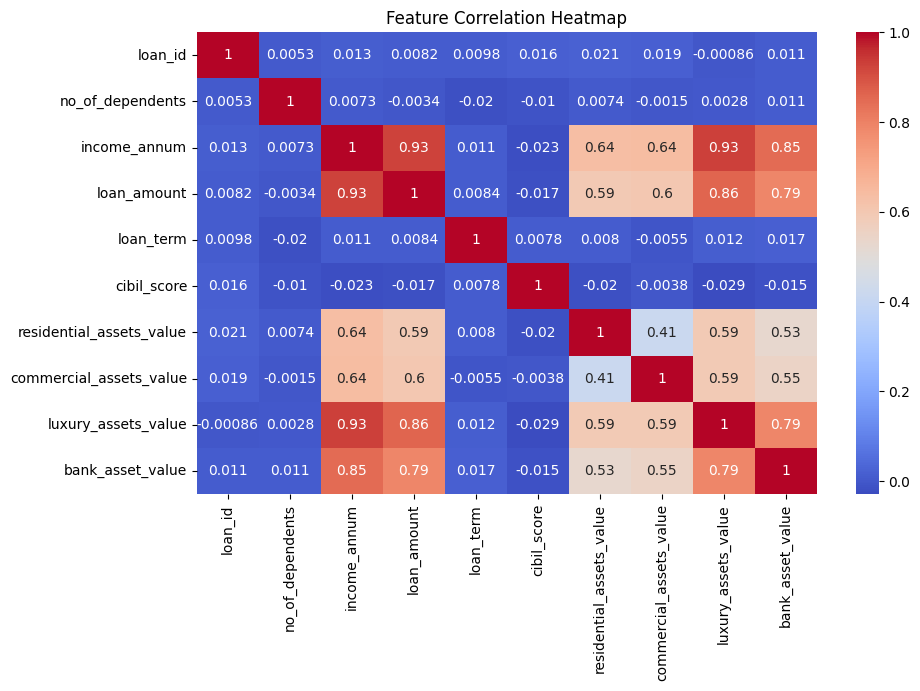

In [19]:
plt.figure(figsize=(10,6))
sb.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Feature Correlation Heatmap')
plt.show()


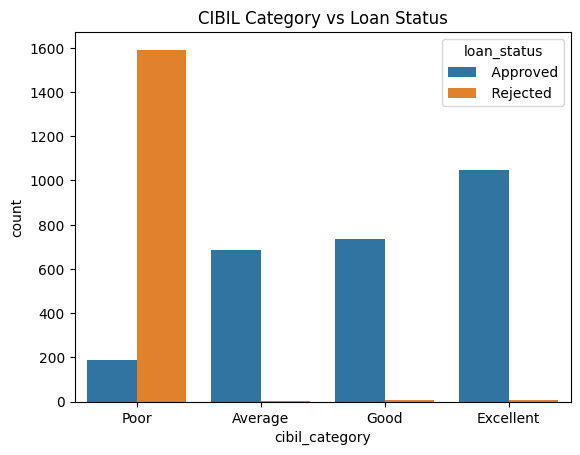

In [20]:
df['cibil_category'] = pd.cut(
    df['cibil_score'],
    bins=[300, 550, 650, 750, 900],
    labels=['Poor', 'Average', 'Good', 'Excellent']
)

sb.countplot(data=df, x='cibil_category', hue='loan_status')
plt.title('CIBIL Category vs Loan Status')
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ['education', 'self_employed', 'loan_status']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [42]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x,y,random_state=42,test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(train_x,train_y)

c:\Users\Angraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
logistic_pred = logistic.predict(test_x)

In [47]:
from sklearn.metrics import accuracy_score , classification_report

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model.fit(train_x,train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
dt_pred = dt_model.predict(test_x)

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(
    n_estimators=500,
    learning_rate=0.5 ,
    random_state=42
)
ada_model.fit(train_x,train_y)
ada_pred = ada_model.predict(test_x)


In [51]:
print("logistic regresion - ",accuracy_score(test_y,logistic_pred))
print(classification_report(test_y,logistic_pred))
print("-"*100)

print("decision tree - ",accuracy_score(test_y,dt_pred))
print(classification_report(test_y,dt_pred))
print("-"*100)

print("adaptive boosting - ",accuracy_score(test_y,ada_pred))
print(classification_report(test_y,ada_pred))


logistic regresion -  0.6323185011709602
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       536
           1       0.53      0.11      0.18       318

    accuracy                           0.63       854
   macro avg       0.59      0.53      0.47       854
weighted avg       0.60      0.63      0.55       854

----------------------------------------------------------------------------------------------------
decision tree -  0.9672131147540983
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       536
           1       0.94      0.97      0.96       318

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

----------------------------------------------------------------------------------------------------
adaptive boosting -  0.9695550351288056
              precision    

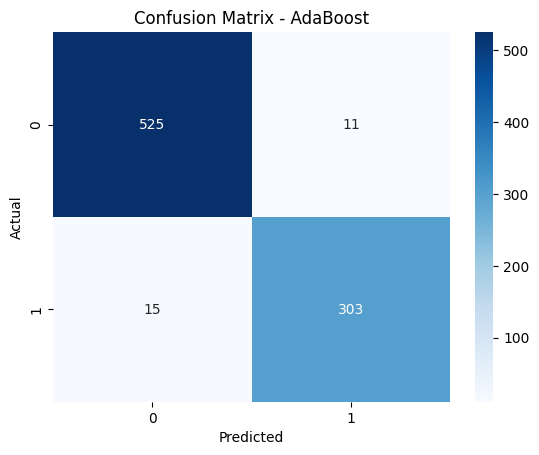

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, ada_pred)

sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
xgb = XGBClassifier(objective='binary:logistic',random_state=42, eval_metric='logloss')
xgb.fit(train_x,train_y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [58]:
xgb_pred = xgb.predict(test_x)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,xgb_pred)

0.9789227166276346

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(train_x, train_y)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.9983080789684564
